This notebook is used for testing and running model fitting pipelines defined in `train_nn.py`.

It's run in the `train_nn` conda environment instead of the usual `nnn` environment.

In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import seaborn as sns
import json, os, pickle
from collections import defaultdict
import nupack
import sklearn
from scipy import stats


from tqdm import tqdm
import itertools

from nnn import util, fileio, mupack, plotting, modeling
import nnn.motif_fit as mf
import wandb

# suppress warnings 
import warnings
warnings.filterwarnings("ignore")

from nnn import train_nn as tnn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# 178 param NUPACK model config
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.,
    secondary_struct = 'target', # target is the ones designed, mfe is predicted
    fit_method = 'svd',
    feature_method = 'get_nupack_feature_list',
    fit_intercept=False, 
    symmetry=False,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'test', # {'val', 'test'}
    use_model_from = 'json', # {'lr_dict', 'json'}
    )

In [4]:
lr_dict_1pass = tnn.train(config)

feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA', 'terminal_penalty#AT', 'terminal_penalty#CG', 'terminal_penalty#GC', 'terminal_penalty#TA']


Error: You must call wandb.init() before wandb.log()

In [59]:
# 178 param NUPACK model refitting config with MFE structure
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.,
    secondary_struct = 'mfe',
    struct_pred_param_file = './models/swift-lake-118.json',
    fit_method = 'svd',
    feature_method = 'get_nupack_feature_list',
    fit_intercept=False, 
    symmetry=False,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'test', # {'val', 'test'}
    use_model_from = 'json', # {'lr_dict', 'json'}
    )

In [2]:
fixed_pclass = []#['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'stack']
config = dict(
    use_train_set_ratio = 1.0,
    fit_method = 'svd',
    feature_method = 'get_feature_list',
    fit_intercept=False,
    stack_size=3,
    symmetry=False,
    sep_base_stack=True,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'lr_dict', # {'lr_dict', 'json'}
    )

In [44]:
# NUPACK-compatible model traoubleshoot config
fixed_pclass = ['hairpin_size', 'interior_size', 'bulge_size', 'hairpin_triloop', 'hairpin_tetraloop', 'terminal_mismatch', 'terminal_penalty', 'stack']
config = dict(
    use_train_set_ratio = .05,
    secondary_struct = 'target', # target is the ones designed, mfe is predicted
    fit_method = 'svd',
    feature_method = 'get_nupack_feature_list',
    fit_intercept=False, 
    symmetry=False,
    fix_some_coef=True,
    fixed_pclass = fixed_pclass,
    test_mode = 'val', # {'val', 'test'}
    use_model_from = 'json', # {'lr_dict', 'json'}
    )

feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA', 'terminal_penalty#AT', 'terminal_penalty#CG', 'terminal_penalty#GC', 'terminal_penalty#TA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[368 rows x 1 columns]

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


{'dH': LinearRegressionSVD(param='dH'), 'dG': LinearRegressionSVD()}

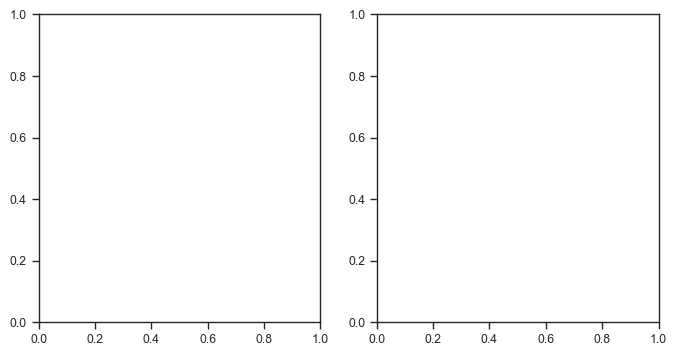

In [45]:
tnn.model_pipeline(config)

In [57]:
mydata = tnn.MyData(config)

In [58]:
mydata.param_set_template_file

'./models/swift-lake-118.json'

In [65]:
fileio.read_pickle('./models/swift-lake-118_lr_dict.pkl')['dG'].coef_df.loc['hairpin_loop_mid#A'].values[0]

4.36477208248927

In [20]:
arr_1M = mydata.get_arr_1M_with_mfe_struct(config['struct_pred_param_file'])

27732it [09:28, 48.76it/s]


In [6]:
# Set the range of ratio of training data used here
myrange = np.logspace(-2, 0,num=10)
myrange

array([0.01      , 0.01668101, 0.02782559, 0.04641589, 0.07742637,
       0.12915497, 0.21544347, 0.35938137, 0.59948425, 1.        ])

feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


feats (27732, 178) Index(['bulge_size#1', 'bulge_size#2', 'hairpin_loop_mid#A'], dtype='object')
fixed_feature_names: ['bulge_size#1', 'bulge_size#2', 'hairpin_size#3', 'hairpin_size#4', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', 'hairpin_size#20', 'interior_size#2', 'interior_size#4', 'stack#AATT', 'stack#ACGT', 'stack#AGCT', 'stack#ATAT', 'stack#CATG', 'stack#CCGG', 'stack#CGCG', 'stack#CTAG', 'stack#GATC', 'stack#GCGC', 'stack#GGCC', 'stack#GTAC', 'stack#TATA', 'stack#TCGA', 'stack#TGCA', 'stack#TTAA']
                           dH
bulge_size#1              0.0
bulge_size#2              0.0
bulge_size#3              0.0
bulge_size#4              0.0
bulge_size#5              0.0
...                       ...
hairpin_tetraloop#CCTTGG  0.0
hairpin_tetraloop#GCTTGC  0.0
hairpin_tetraloop#GCTTGT  0.0
hairpin_tetraloop#TCTTGA  0.0
hairpin_tetraloop#TCTTGG  0.0

[352 rows x 1 columns]
['bulge_size#1', 'bulge_size#2', 'hairpin_size#11', 'hairpin_size#14', 'hairpin_size#17', '

n_feat,▁
n_fixed_feat,▁
train_dG_mae,▁
train_dG_rsqr,▁
train_dH_mae,▁
train_dH_rsqr,▁
val_Tm_adjusted_mae-all,▁
val_Tm_adjusted_mae-arr,▁
val_Tm_adjusted_mae-lit_uv,▁
val_Tm_adjusted_mae-ov,▁
val_Tm_adjusted_rmse-all,▁


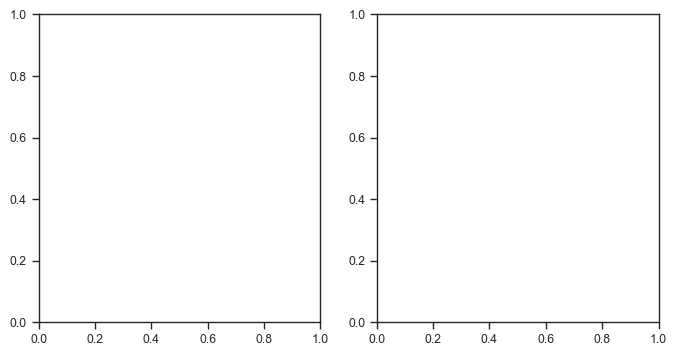

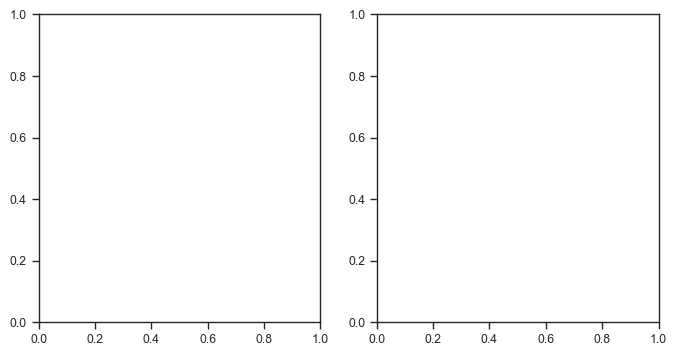

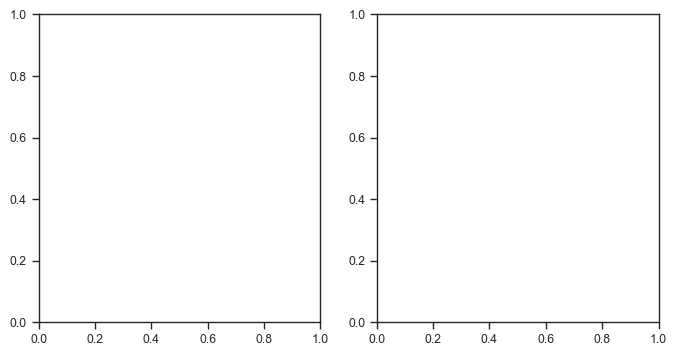

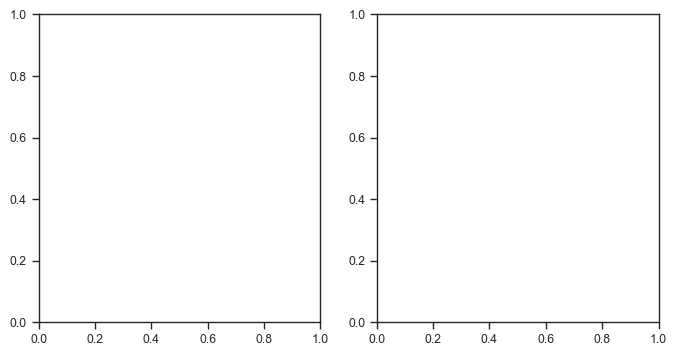

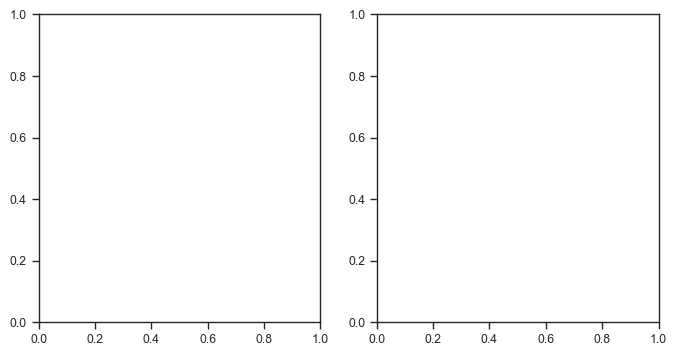

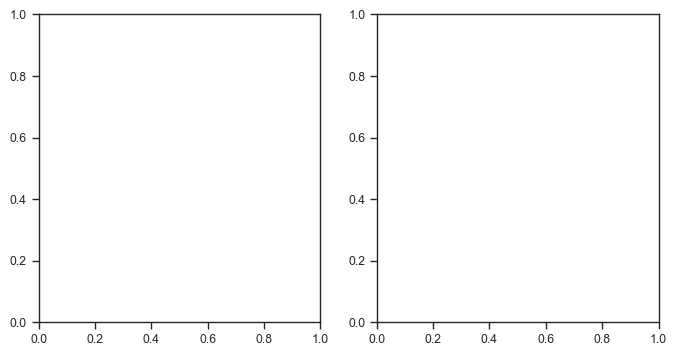

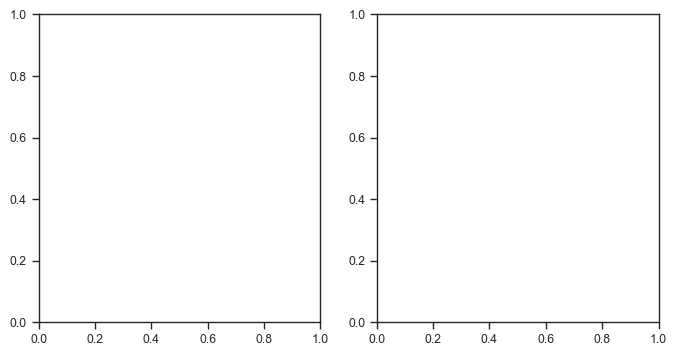

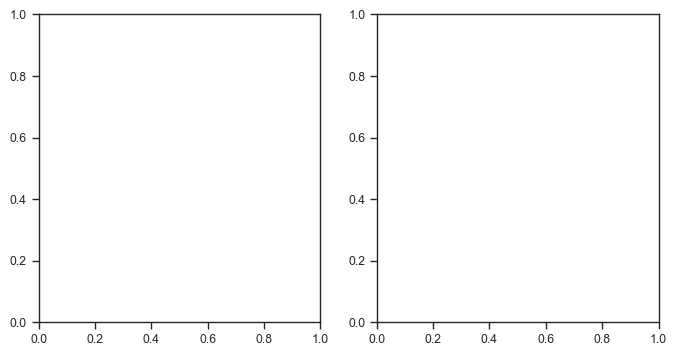

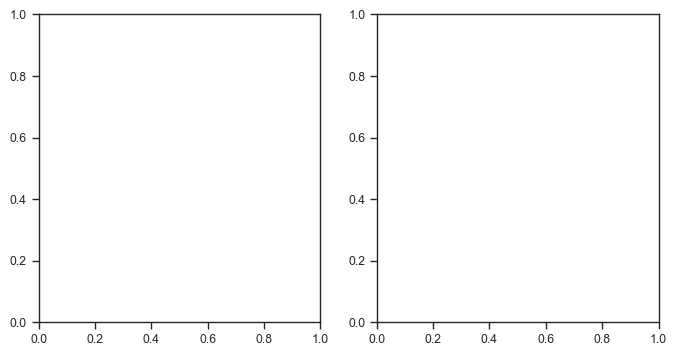

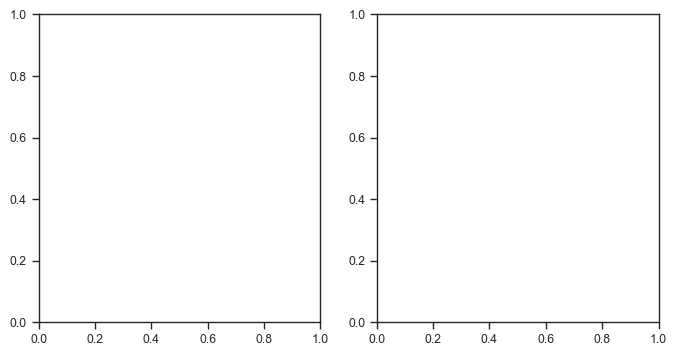

In [9]:
for ratio in myrange:
    config.update(dict(use_train_set_ratio=ratio))
    tnn.model_pipeline(config)

In [7]:
val_result_df = pd.read_csv('./models/ancient-cloud-136_val_result_df.csv', index_col=[0,1])

In [8]:
val_result_df

RefSeq  \
arr MMGTP971                                GTGTGTGGAAACATACAC   
    MMACP1924                               GGATGGGGAAACCCACCC   
    BNNN315                                 GAATCCGAAAGGAGCTTC   
    TETNNN3073                                GATCCAAAATTGGATC   
    BNNN8635                                GCTTCCGAAAGGAGCAGC   
...                                                        ...   
ov  OV1638      ['CGACGTGCTTTATGTGCTG', 'CAGCACATTGGGCACGTCG']   
    OV1095      ['CGACGTGCGACATGTGCTG', 'CAGCACATCACGCACGTCG']   
    OV1130      ['CGACGTGCGATATGTGCTG', 'CAGCACATTCAGCACGTCG']   
    OV1294      ['CGACGTGCTTAATGTGCTG', 'CAGCACATGTGGCACGTCG']   
    OV860       ['CGACGTGCCTAATGTGCTG', 'CAGCACATTATGCACGTCG']   

                                           TargetStruct         dH         Tm  \
arr MMGTP971                         ((((.((....)).)))) -39.560910  48.576922   
    MMACP1924                        ((.((((....)))).)) -24.153575  45.125265   
    BNNN315                          ((((((....)))..))) -23.634372  41.630497   
    TETNNN3073                         ((((((....)))))) -35.827860  48.066638   
    BNNN8635                         ((((((....)))..))) -15.184097  41.673821   
...                                                 ...        ...        ...   
ov  OV1638      ((((((((...((((((((+))))))))...))))))))        NaN  49.800000   
    OV1095      (((((((((..((((((((+))))))))..)))))))))        NaN  52.700000   
    OV1130      ((((((((...((((((((+))))))))...))))))))        NaN  52.800000   
    OV1294      ((((((((...((((((((+))))))))...))))))))        NaN  51.900000   
    OV860       ((((((((.((((((((((+)))))))))).))))))))        NaN  54.000000   

                   dG_37    dH_pred    Tm_pred  dG_37_pred  
arr MMGTP971   -1.423548 -16.613859  22.602670    0.808768  
    MMACP1924  -0.616618  -0.560230 -85.167701    0.364088  
    BNNN315    -0.347667   8.249871  61.911093    0.613361  
    TETNNN3073 -1.234351 -25.756906  24.575149    1.074903  
    BNNN8635   -0.225421   6.749871  14.177435   -0.536146  
...                  ...        ...        ...         ...  
ov  OV1638           NaN        NaN  54.276361         NaN  
    OV1095           NaN        NaN  58.305063         NaN  
    OV1130           NaN        NaN  54.730749         NaN  
    OV1294           NaN        NaN  54.639875         NaN  
    OV860            NaN        NaN  56.172042         NaN  

[2876 rows x 8 columns]